# Using Random Forest and RGB values as features

In [1]:

import pandas as pd
import imageio
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl
import matplotlib.pyplot as plt

In [8]:
import imageio
composite_image = imageio.volread("./data/composite.tif")
labeled_image = imageio.imread("./data/labelling.png")



/Users/palash/ML1/env/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/Users/palash/ML1/env/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/Users/palash/ML1/env/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/Users/palash/ML1/env/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'reverse_bitorder'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/Use

In [9]:
composite_image = composite_image.__array__()
#print(labeled_list)
composite_list = composite_image.reshape((labeled_image.shape[0] * labeled_image.shape[1], 4))
composite_list = pd.DataFrame(composite_list,index=None,columns=['r','g','b','alpha'])


In [10]:
labeled_list = labeled_image.__array__()
#print(labeled_list)
labeled_list[0:1000,7000:8000,:]=0
labeled_image_as_list = labeled_image.reshape((labeled_image.shape[0] * labeled_image.shape[1], 4))
labeled_list = pd.DataFrame(labeled_image_as_list,index=None,columns=['r','g','b','alpha'])
#print(labeled_list)

In [54]:
cred = np.asarray(composite_list['r'])
cgreen = np.asarray(composite_list['g'])
cblue = np.asarray(composite_list['b'])




labels=np.zeros(58971189)

labels=labels.astype(int)
print(labels)

image_labeled = np.column_stack((labeled_list,labels))
image_labeled

image_labeled = pd.DataFrame(image_labeled,index=None,columns=['r','g','b','alpha','labels'])


red = np.asarray(image_labeled['r'])
green = np.asarray(image_labeled['g'])
blue = np.asarray(image_labeled['b'])
labels  = np.asarray(image_labeled['labels'])



[0 0 0 ..., 0 0 0]


In [55]:
for i in range(image_labeled.shape[0]):
       
    if red[i]==255 and green[i] ==255 and blue[i]==0:
        labels[i]=1
    elif red[i]==0 and green[i] ==255 and blue[i]==63:
        labels[i]=2
    elif red[i]==0 and green[i] ==128 and blue[i]==255:
        labels[i]=3
    elif red[i]==191 and green[i] ==0 and blue[i]==255:
        labels[i]=4
    elif red[i]==255 and green[i] ==0 and blue[i]==1:  
        labels[i]=5
    
        



composite_labeled = np.column_stack((cred,cgreen,cblue,labels))

composite_labeled

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ..., 
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [13]:
import collections
collections.Counter(labels)

Counter({0: 50136006,
         1: 1926412,
         2: 1287349,
         3: 1874309,
         4: 1958070,
         5: 1789043})

In [14]:
 #lbp = lbp.reshape(composite_image.shape[0]*composite_image.shape[1])

In [15]:
combined_rgb = np.column_stack((red,green,blue,cred,cgreen,cblue,labels))

In [16]:
combined_rgb = pd.DataFrame(combined_rgb,columns=['r','g','b','cr','cg','cb','l'],dtype='uint8')

In [17]:
combined_rgb = combined_rgb[combined_rgb.l != 0]

In [18]:
print(combined_rgb)

            r    g   b   cr   cg   cb  l
114975      0  255  63  115  136  121  2
114976      0  255  63  118  138  123  2
114977      0  255  63  119  139  125  2
114978      0  255  63  118  137  123  2
114979      0  255  63  115  135  121  2
114980      0  255  63  117  137  124  2
114981      0  255  63  119  138  125  2
114982      0  255  63  118  137  124  2
114983      0  255  63  115  133  121  2
114984      0  255  63  108  124  112  2
114985      0  255  63  100  116  104  2
114986      0  255  63   93  110   97  2
114987      0  255  63  102  119  106  2
114988      0  255  63  105  123  109  2
123607      0  255  63   91  112   95  2
123608      0  255  63   89  110   94  2
123609      0  255  63   97  118  102  2
123610      0  255  63  101  122  107  2
123611      0  255  63  105  126  110  2
123612      0  255  63  110  131  114  2
123613      0  255  63  124  145  130  2
123614      0  255  63  135  155  140  2
123615      0  255  63  132  152  137  2
123616      0  2

In [19]:
#combined_rgb= pd.concat([class1,class2,class3,class4,class5,class6])


In [20]:
X = combined_rgb[['cr','cg','cb']]
y= combined_rgb['l']
X.shape,y.shape

((8835183, 3), (8835183,))

# Using sklearn library for Random Forest Classifier

In [21]:
from sklearn.model_selection import train_test_split 
X_train , X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier(n_jobs=2)
model=rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

# Model Accuracy

In [24]:
 from sklearn.metrics import accuracy_score 
 accuracy = accuracy_score(y_test, predictions)
 print(accuracy) 

0.850262331802


In [25]:
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score, roc_auc_score
accuracy_score(y_test,predictions,normalize=True, sample_weight=None)


0.85026233180176758

In [46]:
predictions = rf.predict(composite_list[['r','g','b']])

predictions=predictions.reshape((6823, 8643))

forest = '#1f4424'
plantation = '#0ae1f2'
fallow_land = '#f7af7a'
grass = '#2bdf61'

nodata='#ffffff'






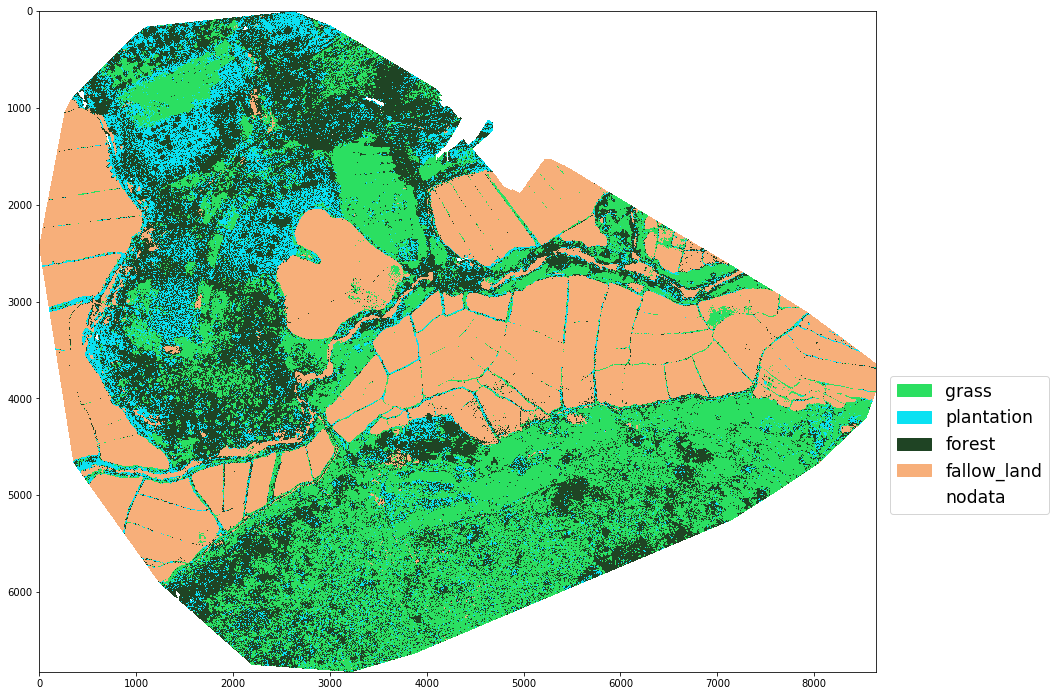

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors, legend, patches
fig_size= plt.rcParams["figure.figsize"]
fig_size[0]=15
fig_size[1]=15
plt.rcParams["figure.figsize"]=fig_size


cm = np.array([grass,plantation,forest,fallow_land,nodata])
cmap = colors.ListedColormap(cm)


plt.imshow(predictions,cmap=cmap)

labels = ["grass","plantation","forest","fallow_land","nodata"]
    
## create patches as legend
patches =[patches.Patch(color=c,label=l) for c,l in zip(cm,labels)]


plt.legend(handles=patches, loc=4, borderaxespad=-10.0, bbox_to_anchor=(1, 0.5),fontsize='xx-large')

#plt.legend(handles=["grass","plantation","forest","trees","fallow_land"])
#plt.colorbar(cmap=cmap ,ticks=["grass","plantation","forest","trees","fallow_land"])
plt.show()

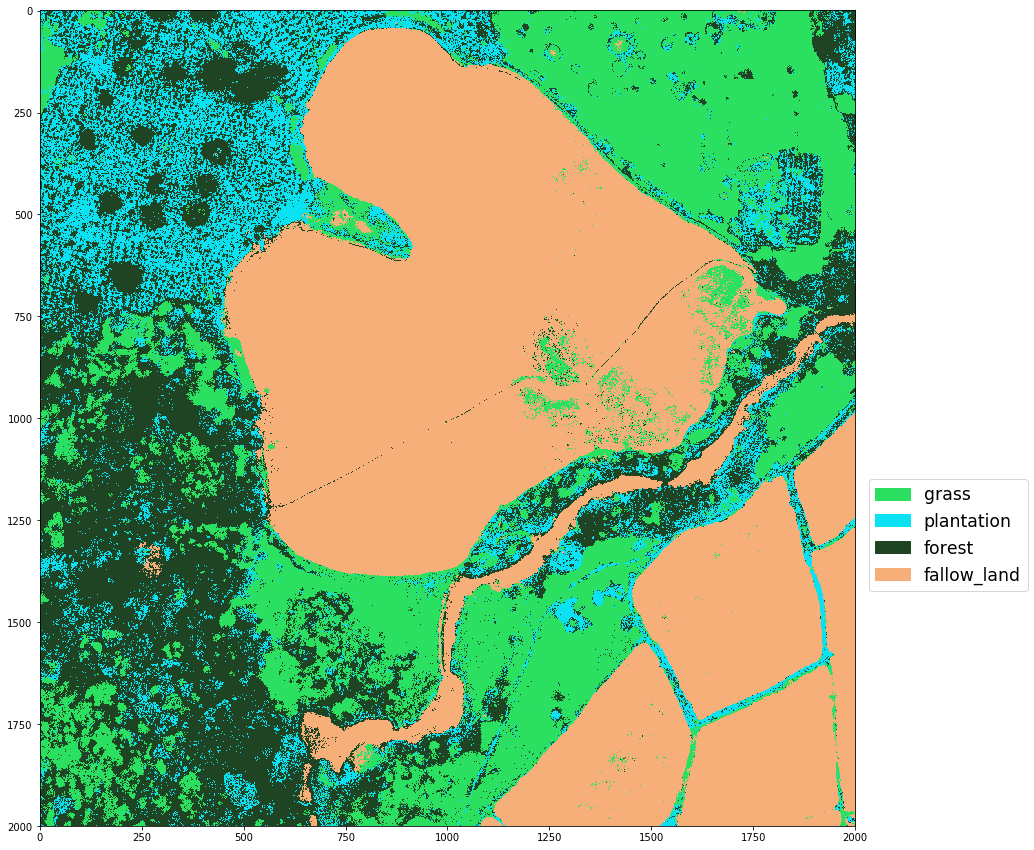

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors, legend, patches
fig_size= plt.rcParams["figure.figsize"]
fig_size[0]=15
fig_size[1]=15
plt.rcParams["figure.figsize"]=fig_size


cm = np.array([grass,plantation,forest,fallow_land])
cmap = colors.ListedColormap(cm)


plt.imshow(predictions[2000:4000,2000:4000],cmap=cmap)

labels = ["grass","plantation","forest","fallow_land"]
    
## create patches as legend
patches =[patches.Patch(color=c,label=l) for c,l in zip(cm,labels)]


plt.legend(handles=patches, loc=4, borderaxespad=-10.0, bbox_to_anchor=(1, 0.5),fontsize='xx-large')

#plt.legend(handles=["grass","plantation","forest","trees","fallow_land"])
#plt.colorbar(cmap=cmap ,ticks=["grass","plantation","forest","trees","fallow_land"])
plt.show()